In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import tqdm

%matplotlib inline

In [0]:
transform = transforms.Compose(
    [transforms.CenterCrop((28,28)),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# transform = transforms.Compose(
#     [transforms.ToTensor(),transforms.CenterCrop(28,28)])

In [3]:
cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:02, 85119040.34it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Training set with Random Labels

In [4]:
cifar_trainset_random = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
np.random.seed(1234)
mask = np.random.uniform(0,1,50000) < 1

a = np.array(cifar_trainset_random.targets)
print("true",a[mask])
a[mask] = np.random.randint(0,10,sum(mask))
print("randomized",a[mask])
cifar_trainset_random.targets = list(a)
#cifar_trainset_random.targets
#cifar_trainset_random.targets[:50000] = np.random.randint(low=0,high=9,size=50000)

Files already downloaded and verified
true [6 9 9 ... 9 1 1]
randomized [9 1 5 ... 7 6 1]


In [5]:
np.unique(cifar_trainset.targets),sum(mask)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 50000)

In [0]:
trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=256,
                                          shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(cifar_testset, batch_size=256,
                                         shuffle=False, num_workers=2)

In [0]:
trainloader_random = torch.utils.data.DataLoader(cifar_trainset_random,batch_size=256,shuffle=False,num_workers=2)

In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()


In [0]:
dataiter_random = iter(trainloader_random)
images_random, labels_random = dataiter_random.next()


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

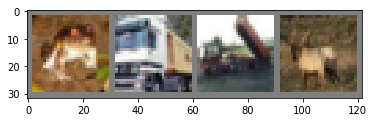

GroundTruth:   frog truck truck  deer


In [12]:
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

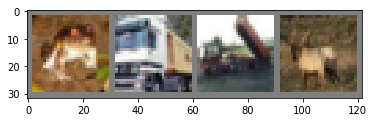

GroundTruth:  truck   car   dog plane


In [13]:
imshow(torchvision.utils.make_grid(images_random[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels_random[j]] for j in range(4)))

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*28*28,512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,512)
        self.fc4 = nn.Linear(512,10)
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #x = x - x.mean(dim=(0,2),keepdim=True)/x.std(dim=(0,2),keepdim=True)
        
        x = (x.view(-1,3*28*28))
        x = self.fc1(x)
        x1 = F.relu(x)
        x2 = F.relu(self.fc2(x1))
        x3 = F.relu(self.fc3(x2))
        x = self.fc4(x3)
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
        return x,{'layer1':x1,'layer2':x2,'layer3':x3}


net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [0]:
params = list(net.parameters())

for p in params:
    print(p)

Parameter containing:
tensor([[-0.0074, -0.0132, -0.0194,  ..., -0.0075,  0.0069, -0.0200],
        [-0.0130,  0.0013,  0.0150,  ..., -0.0083, -0.0042, -0.0131],
        [ 0.0150,  0.0122, -0.0174,  ..., -0.0074, -0.0176, -0.0097],
        ...,
        [ 0.0098,  0.0189, -0.0001,  ..., -0.0180, -0.0113,  0.0069],
        [-0.0125, -0.0134,  0.0184,  ...,  0.0003,  0.0102,  0.0112],
        [-0.0054,  0.0112, -0.0103,  ..., -0.0093, -0.0041,  0.0158]],
       requires_grad=True)
Parameter containing:
tensor([ 7.7789e-03, -8.4900e-03, -5.5119e-03,  7.2365e-03, -6.8693e-03,
        -1.9415e-02,  9.0018e-03, -1.9221e-02, -1.1138e-03, -1.3946e-02,
        -1.1674e-02, -1.2510e-02,  6.1434e-03, -1.2528e-02,  1.6787e-02,
        -8.7811e-03, -9.1548e-03,  2.1894e-03,  3.7677e-03,  1.2452e-02,
         9.6466e-03, -1.8995e-02,  1.3764e-02, -9.6021e-03, -5.6794e-03,
         1.1728e-02,  5.3573e-03,  1.0843e-02, -8.2631e-03,  1.3182e-02,
        -1.6371e-02,  1.3492e-02,  6.6203e-03, -6.0779e-0

In [0]:
act = []
loss_cur = []
for epoch in range(100):  # loop over the dataset multiple times
    ep_loss = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs,_ = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        

        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            ep_loss.append(running_loss) # loss per minibatch
            running_loss = 0.0
            
    loss_cur.append(np.mean(ep_loss))   #loss per epoch
    if (epoch%5 == 0):
        _,acts= net(inputs)
        act.append(acts)

print('Finished Training')

[1,    50] loss: 2.284
[1,   100] loss: 2.150
[1,   150] loss: 1.993
[2,    50] loss: 1.813
[2,   100] loss: 1.737
[2,   150] loss: 1.692
[3,    50] loss: 1.608
[3,   100] loss: 1.560
[3,   150] loss: 1.544
[4,    50] loss: 1.476
[4,   100] loss: 1.445
[4,   150] loss: 1.442
[5,    50] loss: 1.383
[5,   100] loss: 1.362
[5,   150] loss: 1.364
[6,    50] loss: 1.309
[6,   100] loss: 1.291
[6,   150] loss: 1.296
[7,    50] loss: 1.243
[7,   100] loss: 1.225
[7,   150] loss: 1.236
[8,    50] loss: 1.182
[8,   100] loss: 1.164
[8,   150] loss: 1.178
[9,    50] loss: 1.122
[9,   100] loss: 1.109
[9,   150] loss: 1.120
[10,    50] loss: 1.063
[10,   100] loss: 1.054
[10,   150] loss: 1.062
[11,    50] loss: 1.003
[11,   100] loss: 0.997
[11,   150] loss: 1.005
[12,    50] loss: 0.945
[12,   100] loss: 0.940
[12,   150] loss: 0.945
[13,    50] loss: 0.893
[13,   100] loss: 0.883
[13,   150] loss: 0.889
[14,    50] loss: 0.840
[14,   100] loss: 0.831
[14,   150] loss: 0.836
[15,    50] loss: 0

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs,_ = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 100 %


In [0]:
total,correct

(50000, 50000)

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs,_ = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [0]:
dataiter = iter(testloader)


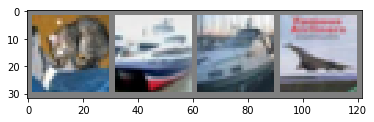

GroundTruth:    cat  ship  ship plane


In [0]:
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# save Activations true

In [0]:
np.save('activation_correct',act)

# load activation true

In [0]:
ac=np.load(~"/content/drive/My Drive/Generalization requires rethinking/activation_correct.npy")

ValueError: ignored

In [0]:
ac[-1]['layer3']>0


tensor([[0, 0, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 0],
        ...,
        [1, 1, 1,  ..., 1, 0, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 0, 1,  ..., 1, 0, 1]], dtype=torch.uint8)

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
(ac[-2]['layer3']>0)

tensor([[0, 0, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 0],
        ...,
        [1, 1, 1,  ..., 1, 0, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 0, 1,  ..., 1, 0, 1]], dtype=torch.uint8)

In [0]:
(ac[-3]['layer3']>0)

tensor([[0, 0, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 0],
        ...,
        [1, 1, 1,  ..., 1, 0, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 0, 1,  ..., 1, 0, 1]], dtype=torch.uint8)

In [0]:
# plt.plot(loss_cur)


# Training with Random Labels

In [0]:
net_random_labels = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_random_labels.parameters(), lr=0.01, momentum=0.9)

In [0]:
actr = []
lossr_cur = []
for epoch in range(100):  # loop over the dataset multiple times
    ep_lossr = []

    running_loss = 0.0
    for i, data in enumerate(trainloader_random, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs,_ = net_random_labels(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            
            ep_lossr.append(running_loss) # loss per minibatch
            running_loss = 0.0
    lossr_cur.append(np.mean(ep_lossr))   #loss per epoch
    if (epoch%5 == 0):
        _,acts= net(inputs)
        actr.append(acts)

print('Finished Training')

[1,    50] loss: 2.279
[1,   100] loss: 2.228
[1,   150] loss: 2.209
[2,    50] loss: 2.202
[2,   100] loss: 2.201
[2,   150] loss: 2.201
[3,    50] loss: 2.199
[3,   100] loss: 2.199
[3,   150] loss: 2.199
[4,    50] loss: 2.198
[4,   100] loss: 2.198
[4,   150] loss: 2.198
[5,    50] loss: 2.197
[5,   100] loss: 2.197
[5,   150] loss: 2.196
[6,    50] loss: 2.196
[6,   100] loss: 2.195
[6,   150] loss: 2.195
[7,    50] loss: 2.194
[7,   100] loss: 2.194
[7,   150] loss: 2.193
[8,    50] loss: 2.192
[8,   100] loss: 2.192
[8,   150] loss: 2.192
[9,    50] loss: 2.190
[9,   100] loss: 2.190
[9,   150] loss: 2.189
[10,    50] loss: 2.188
[10,   100] loss: 2.188
[10,   150] loss: 2.187
[11,    50] loss: 2.185
[11,   100] loss: 2.185
[11,   150] loss: 2.183
[12,    50] loss: 2.181
[12,   100] loss: 2.181
[12,   150] loss: 2.179
[13,    50] loss: 2.176
[13,   100] loss: 2.176
[13,   150] loss: 2.174
[14,    50] loss: 2.170
[14,   100] loss: 2.170
[14,   150] loss: 2.167
[15,    50] loss: 2

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader_random:
        images, labels = data
        outputs,_ = net_random_labels(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 87 %


In [0]:
total,correct

(50000, 43899)

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs,_ = net_random_labels(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 9 %


In [0]:
dataiter = iter(testloader)

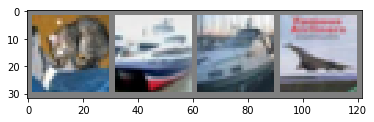

GroundTruth:    cat  ship  ship plane


In [0]:
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

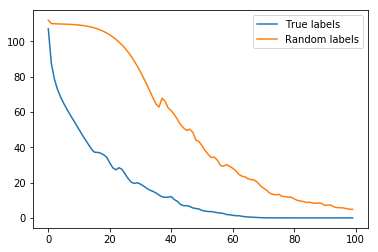

In [0]:
plt.plot(loss_cur,label='True labels')
plt.plot(lossr_cur,label='Random labels')
plt.legend()

# save activation random label

In [0]:
np.save('activation_random',actr)


# load activation random label

In [0]:
acr=np.load("activation_random.npy")

In [0]:
actr[-1]['layer3']>0

In [0]:
actr[-2]['layer3']>0

In [0]:
actr[-3]['layer3']>0

# Conv Module

In [0]:
class Conv_module(nn.Module):
    def __init__(self,inp_ch,f,s,k,pad):
        super(Conv_module,self).__init__()
        self.inp_ch = inp_ch
        self.f = f
        self.s = s 
        self.k = k 
        self.pad = pad
        
        
        self.conv = nn.Conv2d(self.inp_ch,self.f,k,stride=s,padding=self.pad)
        self.bn = nn.BatchNorm2d(self.f)
        self.act = nn.ReLU()
    def forward(self,x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        return x

In [15]:
conv = Conv_module(3,64,1,3,1)
conv.forward(images).shape

torch.Size([256, 64, 28, 28])

# Inception module

In [0]:
class inception_module(nn.Module):
    def __init__(self,inp_ch,f0,f1):
        super(inception_module, self).__init__()
        self.inp_ch = inp_ch
        self.f0 = f0
        self.f1 = f1
        
        
        
        self.conv1 = Conv_module(self.inp_ch,self.f0,1,1,pad=0)
        self.conv3 = Conv_module(self.inp_ch,self.f1,1,3,pad=1)
        #self.conv1 = nn.Conv2d(3,self.f0,1)
        #self.conv3 = nn.Conv2d(3,self.f1,3,padding=1)
    def forward(self,x):
        x1 = self.conv1.forward(x)
        x3 = self.conv3.forward(x)
        #print(x1.shape,x3.shape)
        
        x = torch.cat((x1,x3),dim=1)
        
    
        return x

In [0]:
inc_module = inception_module(96,32,32)
conv_module = Conv_module(3,96,1,1,0)

In [18]:
img = conv_module(images)
print(img.shape)
inc_module.forward(img).shape

torch.Size([256, 96, 28, 28])


torch.Size([256, 64, 28, 28])

# Downsample module

In [0]:
class downsample_module(nn.Module):
    def __init__(self,inp_ch,f):
        super(downsample_module,self).__init__()
        self.inp_ch = inp_ch
        self.f = f
        self.conv = Conv_module(self.inp_ch,self.f,2,3,pad=0)
        self.pool = nn.MaxPool2d(3,stride=2,padding=0)
    def forward(self,x):
        x1 = self.conv(x)
        #print(x1.shape)
        x2 = self.pool(x)
        #print(x2.shape)
        x = torch.cat((x1,x2),dim=1)
        
        return x,x1
        

# Inception Network

In [0]:
class inception_net(nn.Module):
    def __init__(self):
        super(inception_net,self).__init__()
        self.conv1 = Conv_module(3,96,1,3,0)
        
        self.incept1 = inception_module(96,32,32)
        self.incept2 = inception_module(64,32,48)
        
        self.downsample1 = downsample_module(80,80)
        
        self.incept3 = inception_module(160,112,48)
        self.incept4 = inception_module(160,96,64)
        self.incept5 = inception_module(160,80,80)
        self.incept6 = inception_module(160,48,96)
        
        self.downsample2 = downsample_module(144,96)
        
        self.incept7 = inception_module(240,176,60)
        self.incept8 = inception_module(236,176,60)
        
        self.pool = nn.AvgPool2d(5)
        
        
        
        self.linear = nn.Linear(236,10)
    def forward(self,x):
        x = self.conv1.forward(x)
        #act1 = x
        
        x = self.incept1.forward(x)
        #act2 = x
        
        x = self.incept2.forward(x)
        #act3 = x
        
        x,act4 = self.downsample1.forward(x)
        
        x = self.incept3.forward(x)
        #act5 = x
        
        x = self.incept4.forward(x)
        #act6 = x
        
        x = self.incept5.forward(x)
        #act7 = x
        
        x = self.incept6.forward(x)
        #act8 = x
        
        x,act9 = self.downsample2.forward(x)
        
        x = self.incept7.forward(x)
        #act10 = x
        x = self.incept8.forward(x)
        #act11 = x
        print(x.size())
        x = self.pool(x)
        print(x.size())
        x = x.view(-1,1*1*236)

        x = self.linear(x) 
        #activatn = {"act1":act1,"act2":act2,"act3":act3,"act4":act4,"act5":act5,"act6":act6,
         #           "act7":act7,"act8":act8,"act9":act9,"act10":act10,"act11":act11}
        return x
        
        
    

In [27]:
inc = inception_net()
inc(images)

torch.Size([256, 236, 5, 5])
torch.Size([256, 236, 1, 1])


tensor([[-0.0838,  0.0731,  0.0159,  ..., -0.4376, -0.0212, -0.0291],
        [-0.1312,  0.1376, -0.0910,  ..., -0.5030, -0.0301, -0.1010],
        [-0.1859, -0.0356,  0.0292,  ..., -0.3127,  0.2191, -0.0463],
        ...,
        [-0.2490, -0.2205, -0.1003,  ..., -0.3258,  0.3213,  0.1219],
        [-0.2234, -0.3236, -0.0420,  ..., -0.3054,  0.2627,  0.1676],
        [ 0.0589,  0.1056, -0.0247,  ..., -0.4347,  0.0323, -0.2087]],
       grad_fn=<AddmmBackward>)

In [0]:
inc = inception_net()
inc = inc.to("cuda")

In [0]:
inc.forward(images.to("cuda"))[0].shape

torch.Size([10])

In [0]:
criterion_inception = nn.CrossEntropyLoss()
optimizer_inception = optim.SGD(inc.parameters(), lr=0.1, momentum=0.9)

In [0]:
acti = []
loss_curi = []
inc.train()
for epoch in range(25): # loop over the dataset multiple times
    ep_lossi = []

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs,labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer_inception.zero_grad()

        # forward + backward + optimize
        outputs= inc(inputs)
        loss = criterion_inception(outputs, labels)
        loss.backward()
        optimizer_inception.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            ep_lossi.append(running_loss) # loss per minibatch
            running_loss = 0.0
            
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actis= inc(inputs)
#         acti.append(actis)
    
            

print('Finished Training')

[1,    50] loss: 1.745
[1,   100] loss: 1.365
[1,   150] loss: 1.171


KeyboardInterrupt: ignored

In [0]:
correct = 0
total = 0
inc.eval()
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images,labels = images.to("cuda"),labels.to("cuda")
        outputs = inc(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

In [0]:
total,correct

In [0]:
correct = 0
total = 0
inc.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to("cuda"),labels.to("cuda")
        outputs = inc(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [0]:
correct,total

# save activation true label

In [0]:
np.save('activation_incep',acti)


# load activation true label

In [0]:
act_it = np.load('activation_incep.npy')

In [0]:
acti[-1]['act11']>0

tensor([[[[0, 1, 1, 1, 1],
          [1, 0, 0, 1, 1],
          [0, 0, 0, 1, 1],
          [0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0]],

         [[1, 1, 1, 1, 0],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 0]],

         [[0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0],
          [0, 1, 1, 0, 0],
          [0, 1, 1, 0, 0],
          [0, 1, 1, 1, 1]],

         ...,

         [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 1, 1],
          [1, 0, 0, 0, 0],
          [1, 0, 0, 0, 0]],

         [[1, 1, 1, 0, 1],
          [1, 1, 0, 0, 1],
          [0, 0, 0, 0, 1],
          [0, 0, 0, 0, 1],
          [1, 1, 0, 0, 1]],

         [[0, 1, 0, 0, 0],
          [0, 1, 0, 0, 0],
          [0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]]],


        [[[1, 0, 0, 1, 1],
          [1, 1, 0, 1, 1],
          [1, 1, 1, 1, 1],
          [0, 1, 0, 1, 1],
          [0, 1, 0, 1, 1]],

         [[0, 0, 0, 0, 0

In [0]:
(acti[-2]['act11']>0)

tensor([[[[0, 1, 1, 1, 1],
          [0, 0, 1, 0, 1],
          [0, 0, 0, 0, 1],
          [0, 0, 1, 1, 1],
          [0, 0, 0, 1, 0]],

         [[1, 1, 1, 1, 0],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[0, 0, 0, 0, 1],
          [0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]],

         ...,

         [[0, 0, 0, 1, 0],
          [0, 1, 1, 1, 0],
          [0, 0, 0, 1, 1],
          [1, 0, 0, 1, 0],
          [1, 1, 0, 0, 0]],

         [[1, 1, 1, 1, 0],
          [1, 1, 0, 0, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 0, 1, 1],
          [1, 1, 1, 1, 1]],

         [[0, 1, 0, 0, 0],
          [0, 1, 1, 0, 1],
          [0, 0, 0, 0, 1],
          [0, 0, 0, 0, 1],
          [0, 1, 1, 0, 1]]],


        [[[1, 0, 0, 0, 1],
          [1, 1, 0, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0]],

         [[0, 0, 0, 1, 0

# training mini inception random labels

In [0]:
inc_net_random_labels = inception_net()
inc_net_random_labels = inc_net_random_labels.to("cuda")

In [0]:
criterion_inc_rand = nn.CrossEntropyLoss()
optimizer_inc_rand = optim.SGD(inc_net_random_labels.parameters(), lr=0.01, momentum=0.9)

In [0]:
actri = []
lossr_curi = []
inc_net_random_labels.train()
for epoch in range(100):  # loop over the dataset multiple times
    ep_lossri = []
    

    running_loss = 0.0
    for i, data in enumerate(trainloader_random, 0):
        # get the inputs
        inputs, labels = data
        inputs,labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer_inc_rand.zero_grad()

        # forward + backward + optimize
        outputs = inc_net_random_labels(inputs)
        loss = criterion_inc_rand(outputs, labels)
        loss.backward()
        optimizer_inc_rand.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            ep_lossri.append(running_loss)
            running_loss = 0.0
            
    lossr_curi.append(np.mean(ep_lossri))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actirs= inc(inputs)
#         actri.append(actirs)
    

print('Finished Training')

[1,    50] loss: 2.309
[1,   100] loss: 2.307
[1,   150] loss: 2.305
[2,    50] loss: 2.304
[2,   100] loss: 2.302
[2,   150] loss: 2.302
[3,    50] loss: 2.299
[3,   100] loss: 2.297
[3,   150] loss: 2.297
[4,    50] loss: 2.294
[4,   100] loss: 2.291
[4,   150] loss: 2.291
[5,    50] loss: 2.288
[5,   100] loss: 2.284
[5,   150] loss: 2.284
[6,    50] loss: 2.282
[6,   100] loss: 2.276
[6,   150] loss: 2.277
[7,    50] loss: 2.277
[7,   100] loss: 2.269
[7,   150] loss: 2.266
[8,    50] loss: 2.270
[8,   100] loss: 2.263
[8,   150] loss: 2.259
[9,    50] loss: 2.265
[9,   100] loss: 2.257
[9,   150] loss: 2.249
[10,    50] loss: 2.264
[10,   100] loss: 2.250
[10,   150] loss: 2.231
[11,    50] loss: 2.248
[11,   100] loss: 2.241
[11,   150] loss: 2.218
[12,    50] loss: 2.242
[12,   100] loss: 2.230
[12,   150] loss: 2.191
[13,    50] loss: 2.218
[13,   100] loss: 2.214
[13,   150] loss: 2.187
[14,    50] loss: 2.194
[14,   100] loss: 2.190
[14,   150] loss: 2.163
[15,    50] loss: 2

In [0]:
correct = 0
total = 0
inc_net_random_labels.eval()
with torch.no_grad():
    for data in trainloader_random:
        images, labels = data
        images,labels = images.to("cuda"),labels.to("cuda")
        outputs = inc_net_random_labels(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 99 %


In [0]:
total,correct

(50000, 49994)

In [0]:
correct = 0
total = 0
inc_net_random_labels.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to("cuda"),labels.to("cuda")
        outputs = inc_net_random_labels(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


In [0]:
total,correct 

(10000, 1004)

# save activation random label

In [0]:
np.save('activation_incepr',actri)


# load activation random label

In [0]:
act_ir = np.load('activation_incepr.npy')

In [0]:
act_ir[-1]['act11']>0

tensor([[[[1, 1, 1, 1, 0],
          [1, 1, 1, 0, 0],
          [0, 1, 1, 1, 1],
          [0, 0, 1, 1, 1],
          [0, 0, 0, 0, 1]],

         [[1, 1, 0, 1, 1],
          [0, 1, 1, 1, 1],
          [0, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 0]],

         [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0]],

         ...,

         [[0, 0, 0, 0, 0],
          [0, 1, 1, 0, 0],
          [0, 0, 0, 1, 1],
          [1, 0, 0, 0, 0],
          [1, 1, 0, 0, 0]],

         [[0, 0, 0, 1, 1],
          [0, 0, 0, 0, 1],
          [0, 0, 0, 0, 1],
          [0, 0, 0, 0, 1],
          [1, 1, 1, 0, 0]],

         [[0, 0, 0, 0, 1],
          [1, 1, 1, 0, 0],
          [0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 1]]],


        [[[1, 1, 0, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 0, 1, 1],
          [0, 1, 0, 1, 1]],

         [[0, 0, 0, 0, 1

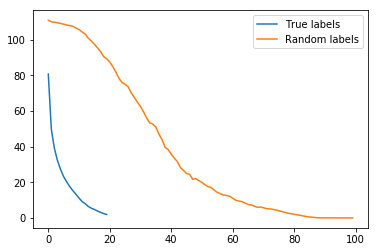

In [0]:
plt.plot(loss_curi,label='True labels')
plt.plot(lossr_curi,label = 'Random labels')
plt.legend()

# Save Model

In [0]:
torch.save(inc_net_random_labels.state_dict(), "inception100_lr_random_01.pt")   #,Path)

In [0]:
torch.save(inc_net_random_labels.state_dict(), "inception_random.pt")   #,Path)

# Load Model

In [0]:
inc.load_state_dict(torch.load("inception.pt"))

# Alexnet

In [0]:
class conv_alex(nn.Module):
    def __init__(self,in_ch,f):
        super(conv_alex,self).__init__()
        self.in_ch = in_ch
        self.f = f
        
        self.conv = nn.Conv2d(in_channels= self.in_ch,out_channels= self.f,kernel_size= 5,stride= 1 )
        
        self.pool = nn.MaxPool2d(3)
        
        self.normalization = nn.LocalResponseNorm(2)
        
    def forward(self,x):
        x = self.conv(x)
        for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer_inception.zero_grad()

        # forward + backward + optimize
        outputs = inc(inputs)
        loss = criterion_inception(outputs, labels)
        loss.backward()
        optimizer_inception.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')
        x = self.pool(x)
        
        x = self.normalization(x)
        
        return x

# Alexnet


In [0]:
class alexnet(nn.Module):
    def __init__(self):
        super(alexnet,self).__init__()
        
        self.conv1 = conv_alex(3,256)
        
        self.conv2 = conv_alex(256,256)
        
        self.linear1 = nn.Linear(256,384)
        self.linear2 = nn.Linear(384,192) 
        self.linear3 = nn.Linear(192,10)
    def forward(self,x):
        x = self.conv1(x)
        
        x = self.conv2(x)
        
        x = x.view(-1,1*256)
        
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x
        

In [0]:
alex_net = alexnet()

In [0]:
criterion_alex = nn.CrossEntropyLoss()
optimizer_alex = optim.SGD(alex_net.parameters(), lr=0.01, momentum=0.9)

In [0]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer_alex.zero_grad()

        # forward + backward + optimize
        outputs = alex_net(inputs)
        loss = criterion_alex(outputs, labels)
        loss.backward()
        optimizer_alex.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = alex_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

In [0]:
total,correct

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = inc(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Save Model


In [0]:
torch.save(inc.state_dict(), "inception.pt")   #,Path)

# Load Model

In [0]:
inc_load = inception_net()


In [0]:
pd.merge()